In [338]:
import numpy as np 
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt
#import cpi
#cpi.update()
from datetime import date
import mplfinance as mpf
import tkinter as tk

today = date.today()


In [339]:
symbol = 'ADBE'
start_date = '2023-07-01' 
end_date = today 
data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [340]:
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
def calculate_ema(prices, period):
    alpha = 2 / (period + 1)
    return prices.ewm(alpha=alpha, adjust=False).mean()

data['50_day_EMA'] = calculate_ema(data['Close'], period=50)
data['200_day_EMA'] = calculate_ema(data['Close'], period=200)

data.head()


,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,50_day_EMA,200_day_EMA
Date,,,,,,,,,,
2023-07-03,486.390015,486.609985,479.839996,485.209991,485.209991,1491000,NaN,NaN,485.209991,485.209991
2023-07-05,480.989990,489.410004,479.730011,487.260010,487.260010,2190000,NaN,NaN,485.290384,485.230390
2023-07-06,479.989990,482.500000,475.000000,481.290009,481.290009,2100900,NaN,NaN,485.133507,485.191182
2023-07-07,481.980011,490.420013,479.859985,485.269989,485.269989,2324500,NaN,NaN,485.138859,485.191966
2023-07-10,485.269989,499.200012,485.109985,496.350006,496.350006,3352600,NaN,NaN,485.578512,485.302991


In [341]:
data['Signal'] = np.where(data['SMA_200'] < data['SMA_50'], 1, 0)
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,50_day_EMA,200_day_EMA,Signal
Date,,,,,,,,,,,
2023-07-03,486.390015,486.609985,479.839996,485.209991,485.209991,1491000,NaN,NaN,485.209991,485.209991,0
2023-07-05,480.989990,489.410004,479.730011,487.260010,487.260010,2190000,NaN,NaN,485.290384,485.230390,0
2023-07-06,479.989990,482.500000,475.000000,481.290009,481.290009,2100900,NaN,NaN,485.133507,485.191182,0
2023-07-07,481.980011,490.420013,479.859985,485.269989,485.269989,2324500,NaN,NaN,485.138859,485.191966,0
2023-07-10,485.269989,499.200012,485.109985,496.350006,496.350006,3352600,NaN,NaN,485.578512,485.302991,0


In [342]:
data['Daily_Return'] = data['Close'].pct_change() 
data['Strategy_Return'] = data['Daily_Return'] * data['Signal'].shift(1) 
data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,50_day_EMA,200_day_EMA,Signal,Daily_Return,Strategy_Return,Cumulative_Return
Date,,,,,,,,,,,,,,
2023-07-03,486.390015,486.609985,479.839996,485.209991,485.209991,1491000,NaN,NaN,485.209991,485.209991,0,NaN,NaN,NaN
2023-07-05,480.989990,489.410004,479.730011,487.260010,487.260010,2190000,NaN,NaN,485.290384,485.230390,0,0.004225,0.0,1.0
2023-07-06,479.989990,482.500000,475.000000,481.290009,481.290009,2100900,NaN,NaN,485.133507,485.191182,0,-0.012252,-0.0,1.0
2023-07-07,481.980011,490.420013,479.859985,485.269989,485.269989,2324500,NaN,NaN,485.138859,485.191966,0,0.008269,0.0,1.0
2023-07-10,485.269989,499.200012,485.109985,496.350006,496.350006,3352600,NaN,NaN,485.578512,485.302991,0,0.022833,0.0,1.0


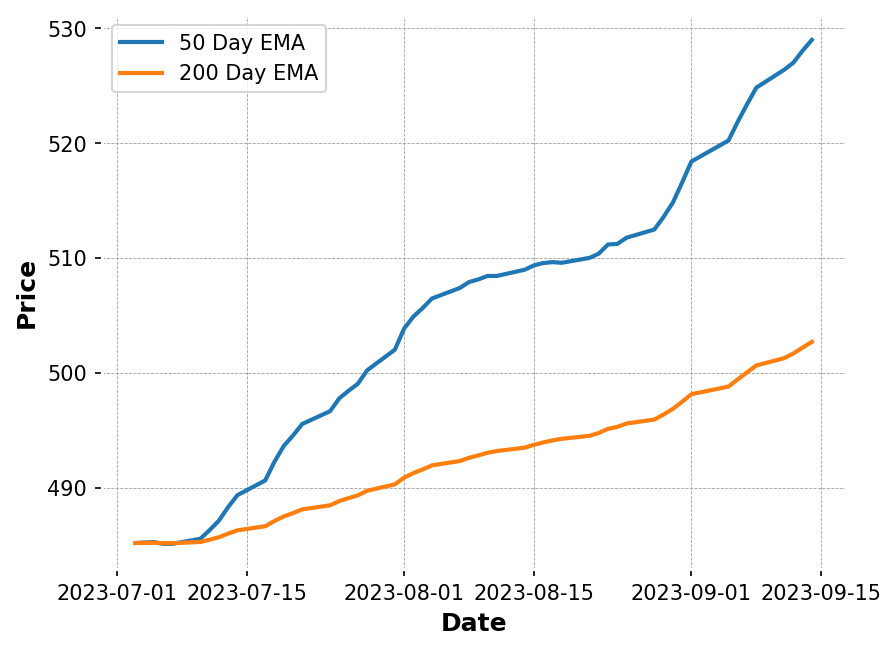

<Figure size 1920x1440 with 0 Axes>

In [343]:
plt.figure(dpi=150)
#plt.plot(data.index, data['SMA_50'], label='50 Day SMA') 
#plt.plot(data.index, data['SMA_200'], label='200 Day SMA')
plt.plot(data.index, data['50_day_EMA'], label='50 Day EMA') 
plt.plot(data.index, data['200_day_EMA'], label='200 Day EMA')
plt.xlabel('Date') 
plt.ylabel('Price') 
plt.legend() 
plt.show()
plt.figure(dpi=300)
rolling_window = 10
data['Rolling High'] = data['High'].rolling(window=rolling_window).max()
data['Rolling Low'] = data['Low'].rolling(window=rolling_window).min()

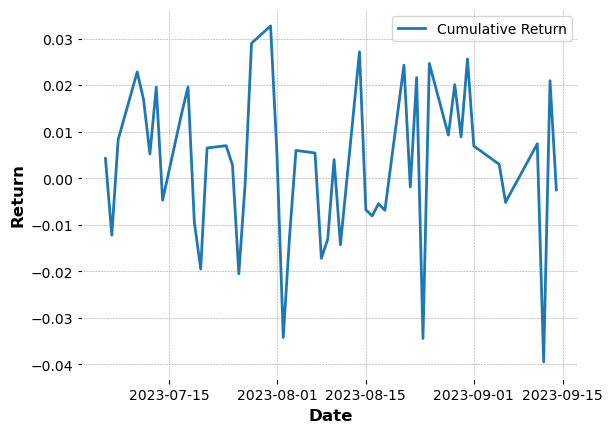

In [344]:
#plt.figure(dpi=200)
plt.plot(data.index, data['Daily_Return'], label='Cumulative Return')
plt.xlabel('Date') 
plt.ylabel('Return') 
plt.legend() 
plt.show()

In [345]:
print(data.iloc[-1:])

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-14  551.090027  555.190002  544.340027  552.159973  552.159973   

             Volume      SMA_50  SMA_200  50_day_EMA  200_day_EMA  Signal  \
Date                                                                        
2023-09-14  4786900  527.573599      NaN  528.996147    502.71361       0   

            Daily_Return  Strategy_Return  Cumulative_Return  Rolling High  \
Date                                                                         
2023-09-14     -0.002529             -0.0                1.0     570.23999   

            Rolling Low  
Date                     
2023-09-14   540.369995  


<Figure size 1920x1440 with 0 Axes>

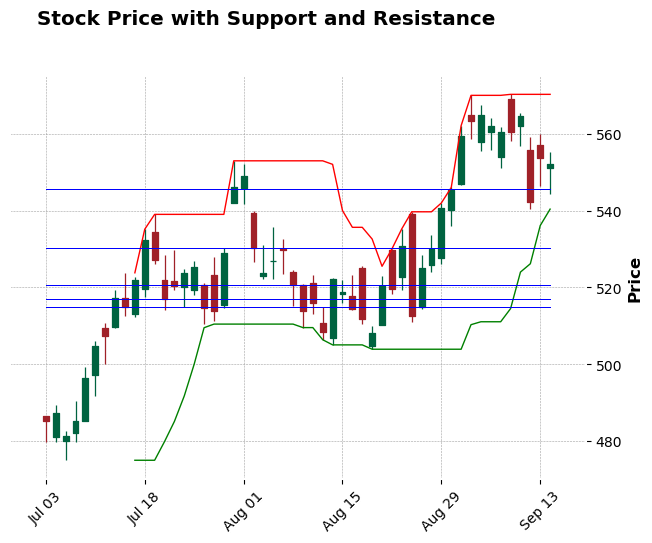

In [346]:
# Sample data loading (replace this with your data source)
# Assume the DataFrame df has columns: 'Open', 'High', 'Low', 'Close', and 'Volume'
# df = pd.read_csv('your_stock_data.csv')
#data['Date'] = pd.to_datetime(data['Date'])
#data.set_index('Date', inplace=True)

# Rolling highs and lows
plt.figure(dpi=300)
rolling_window = 10
data['Rolling High'] = data['High'].rolling(window=rolling_window).max()
data['Rolling Low'] = data['Low'].rolling(window=rolling_window).min()

# Volume profile calculation
price_bins = 100  # number of bins for volume profile
bin_prices = np.linspace(data['Low'].min(), data['High'].max(), price_bins)
data['Price Bin'] = pd.cut(data['Close'], bins=bin_prices)
volume_profile = data.groupby('Price Bin')['Volume'].sum()

# Major volume price levels
major_volume_levels = volume_profile.nlargest(5).index.to_list()

# Extracting approximate price levels for plotting
approx_major_volumes = []
for level in major_volume_levels:
    approx_major_volumes.extend([level.mid] * len(data))

# Plotting
ap = [
    mpf.make_addplot(data['Rolling High'], color='r', width = 1),
    mpf.make_addplot(data['Rolling Low'], color='g', width = 1)
]

for level in approx_major_volumes:
    ap.append(mpf.make_addplot([level] * len(data), color='b', linestyle='solid', width = 0.5))

mpf.plot(data, type='candle', style='charles', title='Stock Price with Support and Resistance',
         ylabel='Price', addplot=ap, volume=False)


In [347]:
#import requests

#country = 'United States'
#api_url = 'https://api.api-ninjas.com/v1/inflation?country={}'.format(country)
#response = requests.get(api_url, headers={'X-Api-Key': 'NeWT6x6xXA9FJ4soDn/foA==4csIvbtX3KSIvtMB'})
#if response.status_code == requests.codes.ok:
#    print(response.text)
#else:
#    print("Error:", response.status_code, response.text)

In [348]:
#cpi_items_df = cpi.series.get(seasonally_adjusted=False).to_dataframe()

In [349]:
#cpi_items_df = cpi_items_df[cpi_items_df['period_type']=='monthly']
#plt.plot(data.index, data['Close'], label='AAPL Price') 
#plt.xlabel('Date')
#plt.legend() 
#plt.show()
#cpi_items_df['date'] = pd.to_datetime(cpi_items_df['date'])
#cpi_items_df = cpi_items_df.set_index('date')

In [350]:
#fig = plt.figure(dpi=200)
#cpi_items_df['value'].loc['2015':'2023'].plot()
#plt.xlabel('Date')
#plt.ylabel('CPI Value')